Letterkenny Institute of Technology

Artificial Intelligence II

Juan Miguel Lopez Alcaraz

L00162566

Index

1) Importing libraries

2) Extracting region of interest


3) Processing Techniques (Over 4 unique format files)

    3.1) First approach
    3.2) Colour Mapping
        3.2.1) BGR to RGB
        3.2.2) HSV
        3.2.3) HLS
    3.3) Thresholding / Binarisation
        3.3.1) Binary
        3.3.2) Binary_inv
        3.3.3) Trunc
        3.3.4) Tozero
        3.3.5) Tozero_inv
    3.4) Blurring and Smoothing
        3.4.1) Gamma correction
        3.4.2) 2Dconvolution 
        3.4.3) Averaging
        3.4.4) Median
    3.5) Edge Detection
        3.5.1) Canny Edge Detection
    3.6) Contour Detection
        3.6.1) Internal Contours
        3.6.2) External Contours
        
4) Techniques Application 

(collection of the 3 best processing techniques and application over the 50 images)

5) Results

1) Importing Libraries

In [44]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import re
import difflib 
import statistics
import numpy as np

import pytesseract
from PIL import Image
from io import BytesIO

2) Extracting Region of Interest

In [45]:
# Read a single image and analyzing it's dimmensions/shape

img = cv2.imread(f"files/RedactedIsometric1-1.jpg")
print(img.shape)

(5850, 8275, 3)


In [46]:
# This function will take the number of the image range 1-50 
# and will read the image with opencv, and slice the image
# in order to get the only part that is requiered for the activity
# Due there are different formats in the dataset, is called fist

def crop_image_fist_format(number):
    img = cv2.imread(f"files\RedactedIsometric{number}-1.jpg")
    crop = img[0:4000, 5950:8100]
    return crop

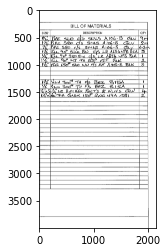

In [47]:
# Here was tried the functions and was found that the format of the
# pictures were same 1 to 4

img1 = crop_image_fist_format(4)
plt.imshow(img1)

In [48]:
# Here the function applied in images 1 to 4 and assigned new desired picture
# to a variable crop

crop1 = crop_image_fist_format(1)
crop2 = crop_image_fist_format(2)
crop3 = crop_image_fist_format(3)
crop4 = crop_image_fist_format(4)

In [49]:
# This function works similar than the last, but was modified to get the 
# desired image in a second format

def crop_image_second_format(number):
    img = cv2.imread(f"files\RedactedIsometric{number}-1.jpg")
    crop = img[0:2950, 5600:8100]
    return crop

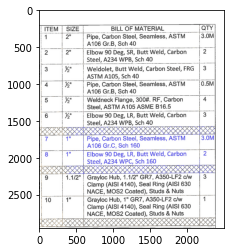

In [50]:
# Here the function applied to find how many images were with this format, 
# it was 5 to 14

img1 = crop_image_second_format(14)
plt.imshow(img1)

In [51]:
# Desired images assigned to a new variable 5 to 14 with second format

crop5 = crop_image_second_format(5)
crop6 = crop_image_second_format(6)
crop7 = crop_image_second_format(7)
crop8 = crop_image_second_format(8)
crop9 = crop_image_second_format(9)
crop10 = crop_image_second_format(10)
crop11 = crop_image_second_format(11)
crop12 = crop_image_second_format(12)
crop13 = crop_image_second_format(13)
crop14 = crop_image_second_format(14)

In [52]:
# Similar than the second, here is a function that modifies for a third format

def crop_image_thrid_format(number):
    img = cv2.imread(f"files\RedactedIsometric{number}-1.jpg")
    crop = img[0:4500, 5300:8000]
    return crop

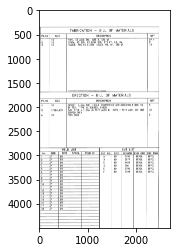

In [53]:
# Third format found in the images 15 and 16

img1 = crop_image_thrid_format(16)
plt.imshow(img1)

In [54]:
# Images 15 and 16 extracted

crop15 = crop_image_thrid_format(15)
crop16 = crop_image_thrid_format(16)

In [55]:
# Images 17 and 18 have the same format as the second format

crop17 = crop_image_second_format(17)
crop18 = crop_image_second_format(18)

In [56]:
# Images 19 to 40 have the same format as in the third format/function

crop19 = crop_image_thrid_format(19)
crop20 = crop_image_thrid_format(20)
crop21 = crop_image_thrid_format(21)
crop22 = crop_image_thrid_format(22)
crop23 = crop_image_thrid_format(23)
crop24 = crop_image_thrid_format(24)
crop25 = crop_image_thrid_format(25)
crop26 = crop_image_thrid_format(26)
crop27 = crop_image_thrid_format(27)
crop28 = crop_image_thrid_format(28)
crop29 = crop_image_thrid_format(29)
crop30 = crop_image_thrid_format(30)
crop31 = crop_image_thrid_format(31)
crop32 = crop_image_thrid_format(32)
crop33 = crop_image_thrid_format(33)
crop34 = crop_image_thrid_format(34)
crop35 = crop_image_thrid_format(35)
crop36 = crop_image_thrid_format(36)
crop37 = crop_image_thrid_format(37)
crop38 = crop_image_thrid_format(38)
crop39 = crop_image_thrid_format(39)
crop40 = crop_image_thrid_format(40)

In [57]:
# New function made for a fifth format

def crop_image_fourth_format(number):
    img = cv2.imread(f"files\RedactedIsometric{number}-1.jpg")
    crop = img[0:3100, 5250:8000]
    return crop

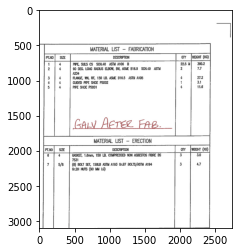

In [58]:
# Fifth format found in images 41 - 50 

img1 = crop_image_fourth_format(50)
plt.imshow(img1)

In [59]:
# Desired images 41 to 50 extracted

crop41 = crop_image_fourth_format(41)
crop42 = crop_image_fourth_format(42)
crop43 = crop_image_fourth_format(43)
crop44 = crop_image_fourth_format(44)
crop45 = crop_image_fourth_format(45)
crop46 = crop_image_fourth_format(46)
crop47 = crop_image_fourth_format(47)
crop48 = crop_image_fourth_format(48)
crop49 = crop_image_fourth_format(49)
crop50 = crop_image_fourth_format(50)

In [60]:
# This function open and read the text files which contain the true value,
# And also do bit of cleaning with regular expressions

def read_text_file(number):
    file = open(f"files\GroundTruth-BOM{number}.txt", "r")
    file = file.read()
    file = re.sub(r"\n", " ", file)
    return file

In [61]:
# Instanciating a empty list, and a foor loop reads the 50 text files
# the file will have a bit of pre processing as well, and each will be appended
# to the variable first instaciated. All texts true values are there

all_text_files = []

for text_file in range(1,51):
    file = open(f"files\GroundTruth-BOM{text_file}.txt", "r")
    file = file.read()
    file = re.sub(r"\n", " ", file)
    all_text_files.append(file)

In [62]:
# Also, here is assigned all the desired images in a variable in order
# to get a easier manipulation later on 

all_images = [crop1, crop2, crop3, crop4, crop5, crop6, crop7, crop8, crop9, crop10,
             crop11, crop12, crop13, crop14, crop15, crop16, crop17, crop18, crop19, crop20,
             crop21, crop22, crop23, crop24, crop25, crop26, crop27, crop28, crop29, crop30,
             crop31, crop32, crop33, crop34, crop35, crop36, crop37, crop38, crop39, crop40,
             crop41, crop42, crop43, crop44, crop45, crop46, crop47, crop48, crop49, crop50]

3.1) Processing Techniques

3.1.1) First Approach

In [63]:
techniques_scores = {}

In [64]:
# Tesseract is instaciated for a first attemp of measure accuracy without any processing to images

pytesseract.pytesseract.tesseract_cmd = r'C:\\Users\\migue\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe'

In [65]:
# Assignind all texts extracted from images with tesseract in a list variable

all_tess = [pytesseract.image_to_string(image) for image in all_images]

In [66]:
# Function that will clean part of the text extracted, the new lines and the
# pipe that was captured and appears in many of the images 

def clean_tess(t):
    t = re.sub(r"\n", " ", t)
    t = t.replace("|","")
    t = t.replace("-","")
    t = t.replace("_","")
    t = t.replace('"',"")
    t = t.replace("'","")
    t = t.replace("—","")
    t = t.replace("  ", "")
    return t

In [67]:
# The last cleaning function will be applied to all the text extracted 

all_tess = [clean_tess(tess) for tess in all_tess]

In [68]:
# Instanciating a variable in which will be appended the score of the sequence 
# matcher, reals text and texts extraxctes. values are 0 to 1 and it is multiplied by 100

scores_tess = []

for tess, text in zip(all_tess, all_text_files):
    score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
    scores_tess.append(score)

In [69]:
# Printing a mean of the 50 extracted texts scores, it is at first instance,
# without image preprocessing

print(f"Mean score of tesseract:", statistics.mean(scores_tess))

Mean score of tesseract: 43.66857165639822


In [70]:
# Printing a score 4 images (1 format each) to analyze scores later on and 
# compare accuracy in order to select the best parameters in image processing
# these images are: 
# 4, 8, 16, 48 

score_4 = difflib.SequenceMatcher(None, all_tess[3], all_text_files[3]).ratio() * 100
score_8 = difflib.SequenceMatcher(None, all_tess[7], all_text_files[7]).ratio() * 100
score_16 = difflib.SequenceMatcher(None, all_tess[15], all_text_files[15]).ratio() * 100
score_48 = difflib.SequenceMatcher(None, all_tess[47], all_text_files[47]).ratio() * 100

scores_base = [score_4, score_8, score_16, score_48]

print("Score of 4th image: ", score_4)
print("Score of 8th image: ", score_8)
print("Score of 16th image: ", score_16)
print("Score of 48th image: ", score_48)
print("Mean of the 4 formats: ", statistics.mean(scores_base))

Score of 4th image:  6.176470588235294
Score of 8th image:  64.58112407211028
Score of 16th image:  50.332005312084995
Score of 48th image:  42.50936329588015
Mean of the 4 formats:  40.89974081707768


In [71]:
techniques_scores["first_approach"] = statistics.mean(scores_base)

In [72]:
# Assigning in variables the true text, and the images to process (last 4 observed)

crops_processing = [crop4, crop8, crop16, crop48]
texts_processing = [all_text_files[3], all_text_files[7], all_text_files[15], all_text_files[47]]

3.2) Colour Mapping

3.2.1) BGR to RGB

In [73]:
# RGB= RED 1/5, GREEN 3/5, BLUE 4/5   
# The based format is BGR due image was read with cv2.imread
# This loop will make them RGB and compare scores

scores_rgb =  []
for image, text in zip(crops_processing, texts_processing):
    im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    tess = pytesseract.image_to_string(im)
    tess = clean_tess(tess)
    score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
    scores_rgb.append(score)
    
print(scores_rgb)

[6.176470588235294, 65.53795740032768, 50.332005312084995, 42.50936329588015]


In [74]:
techniques_scores["BGR2RGB"] = statistics.mean(scores_rgb)

In [75]:
# HSV= HUE color, SATURATION how much, LIGHTNESS black or white
# Now there will be a attempt of increase accuracy mapping to HSV

scores_hsv =  []
for image, text in zip(crops_processing, texts_processing):
    im = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    tess = pytesseract.image_to_string(im)
    tess = clean_tess(tess)
    score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
    scores_hsv.append(score)
    
print(scores_hsv)

[4.71976401179941, 60.37735849056604, 50.16458196181699, 24.11214953271028]


In [76]:
techniques_scores["HSV"] = statistics.mean(scores_hsv)

In [77]:
# HLS= HUE color, SATURATION how much, LIGHTNESS black or white
# Now an attempt with HLS
scores_hls =  []
for image, text in zip(crops_processing, texts_processing):
    im = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    tess = pytesseract.image_to_string(im)
    tess = clean_tess(tess)
    score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
    scores_hls.append(score)
    
print(scores_hls)

[5.839416058394161, 70.94972067039106, 49.70257766027759, 24.118738404452692]


In [78]:
techniques_scores["HLS"] = statistics.mean(scores_hls)

3.3) Thresholding / Binarisation 

3.3.1) Binary

In [79]:
# If pixel grater than the threshold will be assigned to 0 (black)

In [80]:
# for All thresholding is neccesary grayscale images.
# So, Starting with transforming the images as a grayscale
crops_processing_greyscale = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in crops_processing]

In [81]:
# Printing the maximum value of the images (only to see the ranges that has been using)
# In this case all of them have white

for image in crops_processing_greyscale:
    print(image.max())

255
255
255
255


In [40]:
# Defining a function that will take the specific binary function to use, image, text and 
# the number of the format to use 

# For loop which will apply the binarisation function, with thresholds in a range of 70-180
# tesseract will extract the text
# the text will be cleaned
# the clean text will be evaluated with the true text and if the score of that threshold is greater
# than the existent one, will be replaced. Same than the used threshold for that score

# Function will print the best score obtained with the best threshold for that format. 
# Also, a imageshow of it. 

# In the end, the functionwill also return the thresholded image with the best parameter

# image will be or 0=black or 255=white

def binarisation(function, image, text, formatt):
    
    best_thresh = float("-inf")
    best_score = float("-inf")

    for thresh in range(70, 181):
        the, threshimg = cv2.threshold(image, thresh, 255, function)
        tess = pytesseract.image_to_string(threshimg)
        tess = clean_tess(tess)
        score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
        if score > best_score:
            best_score = score
            best_thresh = thresh
                
    print("Score algorithm: ", best_score)
    print("Best threshold for algorithm: ", best_thresh)
    the, threshimg = cv2.threshold(crops_processing_greyscale[formatt], best_thresh, 255, function)
    plt.imshow(threshimg)

Base score for format 1: 6.176470588235294
Score algorithm:  11.746031746031745
Best threshold for algorithm:  156


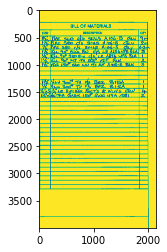

In [41]:
print("Base score for format 1:", scores_base[0])
binarisation(cv2.THRESH_BINARY, crops_processing_greyscale[0], texts_processing[0], 0)

Base score for format 2: 64.58112407211028
Score algorithm:  78.20965842167256
Best threshold for algorithm:  151


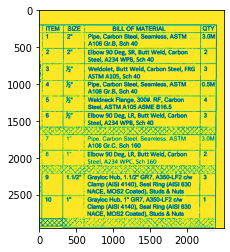

In [42]:
print("Base score for format 2:", scores_base[1])
binarisation(cv2.THRESH_BINARY, crops_processing_greyscale[1], texts_processing[1], 1)

Base score for format 3: 50.332005312084995
Score algorithm:  51.651254953764855
Best threshold for algorithm:  92


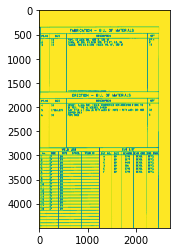

In [43]:
print("Base score for format 3:", scores_base[2])
binarisation(cv2.THRESH_BINARY, crops_processing_greyscale[2], texts_processing[2], 2)

Base score for format 4: 42.50936329588015
Score algorithm:  63.60225140712945
Best threshold for algorithm:  76


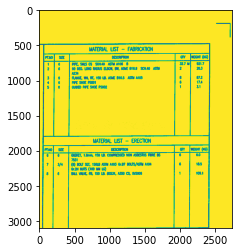

In [44]:
print("Base score for format 4:", scores_base[3])
binarisation(cv2.THRESH_BINARY, crops_processing_greyscale[3], texts_processing[3], 3)

In [82]:
techniques_scores["binary"] = statistics.mean([11.74, 78.20, 51.65, 63.60])

3.3.2) Binary_inv 

In [50]:
# Same than binary approach but inverse, if value greater than threshold will be assigned to white
# same function only changed the specific function (first parameter)

Base score for format 1: 6.176470588235294
Score algorithm:  11.0062893081761
Best threshold for algorithm:  156


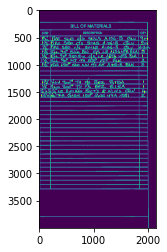

In [45]:
print("Base score for format 1:", scores_base[0])
binarisation(cv2.THRESH_BINARY_INV, crops_processing_greyscale[0], texts_processing[0], 0)

Base score for format 2: 64.58112407211028
Score algorithm:  78.77739331026528
Best threshold for algorithm:  157


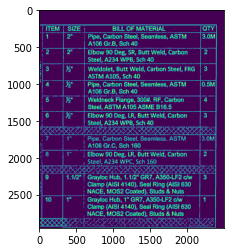

In [46]:
print("Base score for format 2:", scores_base[1])
binarisation(cv2.THRESH_BINARY_INV, crops_processing_greyscale[1], texts_processing[1], 1)

Base score for format 3: 50.332005312084995
Score algorithm:  50.134048257372655
Best threshold for algorithm:  96


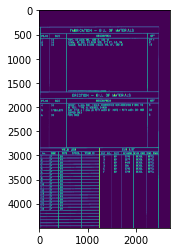

In [47]:
print("Base score for format 3:", scores_base[2])
binarisation(cv2.THRESH_BINARY_INV, crops_processing_greyscale[2], texts_processing[2], 2)

Base score for format 4: 42.50936329588015
Score algorithm:  70.40913415794482
Best threshold for algorithm:  73


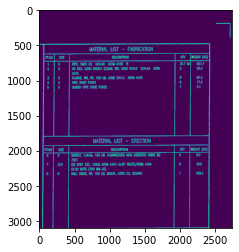

In [48]:
print("Base score for format 4:", scores_base[3])
binarisation(cv2.THRESH_BINARY_INV, crops_processing_greyscale[3], texts_processing[3], 3)

In [83]:
techniques_scores["binary_inv"] = statistics.mean([11, 78.77, 50.13, 70.40])

3.3.3) Trunc

In [52]:
# If the value of pixel intensity is grater than threshold, it is changed to the threshold
# all other values below threshold remains the same

Base score for format 1: 6.176470588235294
Score algorithm:  13.001912045889103
Best threshold for algorithm:  78


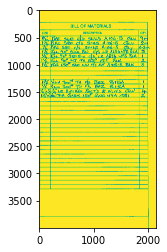

In [49]:
print("Base score for format 1:", scores_base[0])
binarisation(cv2.THRESH_TRUNC, crops_processing_greyscale[0], texts_processing[0], 0)

Base score for format 2: 64.58112407211028
Score algorithm:  72.02680067001675
Best threshold for algorithm:  180


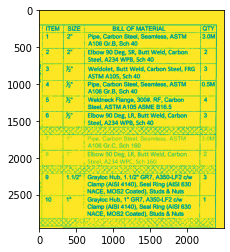

In [50]:
print("Base score for format 2:", scores_base[1])
binarisation(cv2.THRESH_TRUNC, crops_processing_greyscale[1], texts_processing[1], 1)

Base score for format 3: 50.332005312084995
Score algorithm:  52.185430463576154
Best threshold for algorithm:  179


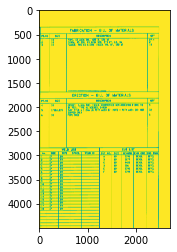

In [51]:
print("Base score for format 3:", scores_base[2])
binarisation(cv2.THRESH_TRUNC, crops_processing_greyscale[2], texts_processing[2], 2)

Base score for format 4: 42.50936329588015
Score algorithm:  71.56276686592656
Best threshold for algorithm:  72


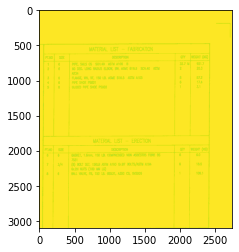

In [52]:
print("Base score for format 4:", scores_base[3])
binarisation(cv2.THRESH_TRUNC, crops_processing_greyscale[3], texts_processing[3], 3)

In [84]:
techniques_scores["trunc"] = statistics.mean([13, 72.02, 52.18, 71.56])

3.3.4) Tozero

In [54]:
# All the pixels are set to 0 (black) if they are less than the threshold value

Base score for format 1: 6.176470588235294
Score algorithm:  10.9717868338558
Best threshold for algorithm:  156


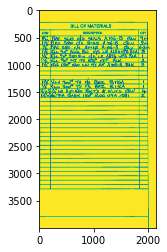

In [53]:
print("Base score for format 1:", scores_base[0])
binarisation(cv2.THRESH_TOZERO, crops_processing_greyscale[0], texts_processing[0], 0)

Base score for format 2: 64.58112407211028
Score algorithm:  76.84331797235023
Best threshold for algorithm:  125


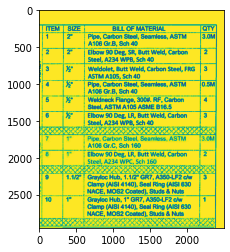

In [54]:
print("Base score for format 2:", scores_base[1])
binarisation(cv2.THRESH_TOZERO, crops_processing_greyscale[1], texts_processing[1], 1)

Base score for format 3: 50.332005312084995
Score algorithm:  51.74456879526004
Best threshold for algorithm:  79


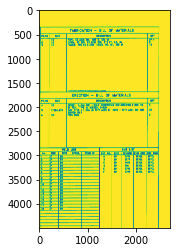

In [55]:
print("Base score for format 3:", scores_base[2])
binarisation(cv2.THRESH_TOZERO, crops_processing_greyscale[2], texts_processing[2], 2)

Base score for format 4: 42.50936329588015
Score algorithm:  46.15384615384615
Best threshold for algorithm:  88


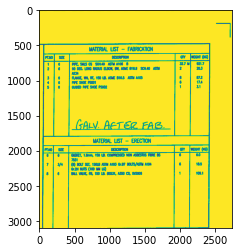

In [56]:
print("Base score for format 4:", scores_base[3])
binarisation(cv2.THRESH_TOZERO, crops_processing_greyscale[3], texts_processing[3], 3)

In [85]:
techniques_scores["tozero"] = statistics.mean([10.97, 76.84, 51.74, 46.15])

3.3.5) Tozero_inv 

In [57]:
# Same as tozero but inverted, if pixel instensity is less than threshold, will be set to 255 (white)

Base score for format 1: 6.176470588235294
Score algorithm:  10.946745562130179
Best threshold for algorithm:  111


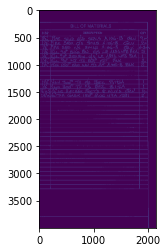

In [58]:
print("Base score for format 1:", scores_base[0])
binarisation(cv2.THRESH_TOZERO_INV, crops_processing_greyscale[0], texts_processing[0], 0)

Base score for format 2: 64.58112407211028
Score algorithm:  79.50236966824644
Best threshold for algorithm:  168


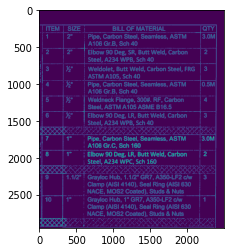

In [59]:
print("Base score for format 2:", scores_base[1])
binarisation(cv2.THRESH_TOZERO_INV, crops_processing_greyscale[1], texts_processing[1], 1)

Base score for format 3: 50.332005312084995
Score algorithm:  49.56463496316142
Best threshold for algorithm:  90


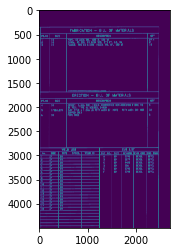

In [60]:
print("Base score for format 3:", scores_base[2])
binarisation(cv2.THRESH_TOZERO_INV, crops_processing_greyscale[2], texts_processing[2], 2)

Base score for format 4: 42.50936329588015
Score algorithm:  64.47368421052632
Best threshold for algorithm:  77


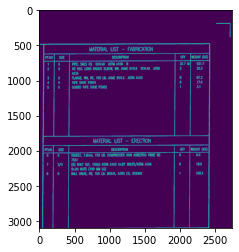

In [61]:
print("Base score for format 4:", scores_base[3])
binarisation(cv2.THRESH_TOZERO_INV, crops_processing_greyscale[3], texts_processing[3], 3)

In [86]:
techniques_scores["tozero_inv"] = statistics.mean([10.94, 79.50, 49.56, 64.47])

3.4) Blurring and Smoothing

In [59]:
# Useful for get rid of noise, focusing in general details.
# Using a lot in edge detection due the detection of too many edges in a high resolution image.

3.4.1) Gamma correction

In [60]:
# It controls the overall brightness of an image
# brighter or darker depending on ghe gamma value chosen.
# less than 1: brighter 
# Above 1: darker 

# Function will take an image an true text as parameters
# Iterating in a foor loop gama values from 0.1 to 3 in 0.1 steps.
# numpy will take every pixel and raise to the power of gamma assigned
# the result will be normalized and datatype assigned again to values in range 0 to 255.

# tesseract will read image, clean text, get scores,
# appending the best score and gamma value achieved 


def gamma(image, text):
    best_gamma = float("-inf")
    best_score = float("-inf")
    
    for gamma in np.arange(0.1, 3.1, 0.1):
        gamma_image = np.power(image, gamma)
        gamma_image = cv2.normalize(gamma_image, None, alpha = 0, beta = 255, 
                                    norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
        gamma_image = gamma_image.astype(np.uint8)
        tess = pytesseract.image_to_string(gamma_image)
        tess = clean_tess(tess)
        score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
        if score > best_score:
            best_score = score
            best_gamma = gamma
            
    print("Score Algorithm: ", best_score)
    print("Best Gamma: ", best_gamma)

In [95]:
print("Base score for format 1:", scores_base[0])
gamma(crops_processing[0], texts_processing[0])

Base score for format 1: 6.176470588235294
Score Algorithm:  11.146496815286625
Best Gamma:  1.2000000000000002


In [97]:
print("Base score for format 2:", scores_base[1])
gamma(crops_processing[1], texts_processing[1])

Base score for format 2: 64.58112407211028
Score Algorithm:  75.36916715888955
Best Gamma:  0.9


In [100]:
print("Base score for format 3:", scores_base[2])
gamma(crops_processing[2], texts_processing[2])

Base score for format 3: 50.332005312084995
Score Algorithm:  52.48508946322068
Best Gamma:  0.4


In [101]:
print("Base score for format 4:", scores_base[3])
gamma(crops_processing[3], texts_processing[3])

Base score for format 4: 42.50936329588015
Score Algorithm:  70.36688617121355
Best Gamma:  1.3000000000000003


In [87]:
techniques_scores["gamma_correction"] = statistics.mean([11.14, 75.36, 52.48, 70.36])

3.4.2) 2Dconvolution

In [75]:
# This is a kernel based filtering method

# Where each pixel in the image is considered part of a neighborhood. 
# The kernel is applied to the neighbourhood by multiplying each to the
# correspond coefficient, then sum all values, and this value will be assigned. 

# Function will take an image an true text as parameters
# the kernel shape will be the size of the pixels (neihghbours) to blurry
# the kernel pixels will be the coeff. assigned to blurry. 

# for shape and for pixel (kernel combinations) pass a 2d filter
# with the image, "-1" for output desired depth means take same as input image, 
# and the kernel to apply each iteration.

# tesseract read strings, clean text, get score and if score better than current
# best score, assign new current best score, shape and pixel. 

def kernel_2Dconvolution(image, text):
    
    shapes = [3, 5, 10, 15, 20]
    pixels = [10, 25, 50, 75, 100]
    
    best_score = float("-inf")
    best_shape = float("-inf")
    best_pixel = float("-inf")
    
    for shape in shapes:
        for pixel in pixels:
            kernel = np.ones(shape=(shape, shape), dtype=np.float32)/pixel
            destination = cv2.filter2D(image, -1, kernel)
            tess = pytesseract.image_to_string(destination)
            tess = clean_tess(tess)
            score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
            if score > best_score:
                best_score = score
                best_shape = shape 
                best_pixel = pixel
                
    print("Score Algorithm: ", best_score)
    print("Best Shape: ", best_shape)
    print("Best Pixel: ", best_pixel)

In [70]:
print("Base score for format 1:", scores_base[0])
kernel_2Dconvolution(crops_processing[0], texts_processing[0])

Base score for format 1: 6.176470588235294
Score Algorithm:  12.643678160919542
Best Shape:  3
Best Pixel:  75


In [71]:
print("Base score for format 2:", scores_base[1])
kernel_2Dconvolution(crops_processing[1], texts_processing[1])

Base score for format 2: 64.58112407211028
Score Algorithm:  79.0757381258023
Best Shape:  10
Best Pixel:  50


In [72]:
print("Base score for format 3:", scores_base[2])
kernel_2Dconvolution(crops_processing[2], texts_processing[2])

Base score for format 3: 50.332005312084995
Score Algorithm:  66.82926829268293
Best Shape:  5
Best Pixel:  10


In [73]:
print("Base score for format 4:", scores_base[3])
kernel_2Dconvolution(crops_processing[3], texts_processing[3])

Base score for format 4: 42.50936329588015
Score Algorithm:  67.99620132953467
Best Shape:  5
Best Pixel:  75


In [88]:
techniques_scores["2Dconvolution"] = statistics.mean([12.64, 79.07, 66.82, 67.99])

3.4.3) Averaging 

In [82]:
# Image blurring technique


# Function will take an image and true text as parameters 
# Similar approach than before but, It will blurr with default values on
# the kernel shapes we assign, in this case 3, 5, 10, 15 and 20 in a foor loop.

def average_blurred(image, text):
    
    shapes = [3, 5, 10, 15, 20]
    
    best_score = float("-inf")
    best_shape = float("-inf")
    
    for shape in shapes:
        blurred = cv2.blur(image, ksize=(shape, shape))
        tess = pytesseract.image_to_string(blurred)
        tess = clean_tess(tess)
        score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
        if score > best_score:
            best_score = score
            best_shape = shape 
    
    print("Score Algorithm: ", best_score)
    print("Best Shape: ", best_shape)

In [77]:
print("Base score for format 1:", scores_base[0])
average_blurred(crops_processing[0], texts_processing[0])

Base score for format 1: 6.176470588235294
Score Algorithm:  7.290015847860539
Best Shape:  5


In [78]:
print("Base score for format 2:", scores_base[1])
average_blurred(crops_processing[1], texts_processing[1])

Base score for format 2: 64.58112407211028
Score Algorithm:  79.37888198757764
Best Shape:  10


In [79]:
print("Base score for format 3:", scores_base[2])
average_blurred(crops_processing[2], texts_processing[2])

Base score for format 3: 50.332005312084995
Score Algorithm:  51.962883654532476
Best Shape:  5


In [80]:
print("Base score for format 4:", scores_base[3])
average_blurred(crops_processing[3], texts_processing[3])

Base score for format 4: 42.50936329588015
Score Algorithm:  64.09048067860509
Best Shape:  5


In [89]:
techniques_scores["averaging"] = statistics.mean([7.29, 79.37, 51.96, 64.09])

3.4.4) Median

In [83]:
# Image blurring technique

# Take a group of pixels from the kernel shape, calculate averages and assign as output

# Function will take an image and true text as parameters 
# Similar approach than before but, It will blurr with default values on
# the kernel shapes we assign, in this case 3, 5, 10, 15 and 20 in a foor loop.

def median_blurred(image, text):
    
    shapes = [3, 5, 7, 9]
    
    best_score = float("-inf")
    best_shape = float("-inf")
    
    for shape in shapes:
        blurred = cv2.medianBlur(image, shape)
        tess = pytesseract.image_to_string(blurred)
        tess = clean_tess(tess)
        score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
        if score > best_score:
            best_score = score
            best_shape = shape 
    
    print("Score Algorithm: ", best_score)
    print("Best Shape: ", best_shape)

In [153]:
print("Base score for format 1:", scores_base[0])
median_blurred(crops_processing[0], texts_processing[0])

Base score for format 1: 6.176470588235294
Score Algorithm:  6.907894736842106
Best Shape:  9


In [154]:
print("Base score for format 2:", scores_base[1])
median_blurred(crops_processing[1], texts_processing[1])

Base score for format 2: 64.58112407211028
Score Algorithm:  67.5534991324465
Best Shape:  9


In [155]:
print("Base score for format 3:", scores_base[2])
median_blurred(crops_processing[2], texts_processing[2])

Base score for format 3: 50.332005312084995
Score Algorithm:  53.87299371946964
Best Shape:  5


In [156]:
print("Base score for format 4:", scores_base[3])
median_blurred(crops_processing[3], texts_processing[3])

Base score for format 4: 42.50936329588015
Score Algorithm:  68.91522333637192
Best Shape:  5


In [90]:
techniques_scores["median"] = statistics.mean([6.90, 67.55, 53.87, 68.91])

3.5) Edge Detection

3.5.1) Canny Edge Detection

In [55]:
# Multi-stage algorithm (background work):
# Gaussian filter to remove noise
# non-maximum suppression to eliminate falsified response to edge detection
# double threshold to identify possible edges
# track edges by hysteres: filtering weak edges. 

# We do:
# Blurring images (extra pre blurring for high resolution images with too much noise)(best practice)
# Iterating with threasure values for the edges detection. 

In [90]:
# Function will take image and true text as parameters.
# There is a List of kernel shapes for iteration with first blurring applied through for loop
# Also iteration of lowers and uppers thresholding values

# for an optimal iteration of lower and upper threasure values, a median pixel value
# of the image is instanciating, and as a general approach:
# the lower threshold would be the greater between 0 or lower value of the median value
# the higuer threshold would be the lower between 255 or upper value of the median value

# The result image will be analyzed with tesseract, text cleaned, and score obtained
# assigning best scores, and kernel shapes everytime new highest score comes up.

# The same process will be repeated but only with the best values, so an image
# will be displayed with the best parameters. 

def canny_edge_detection(image, text):

    shapes = [3, 5, 10, 15, 20]
    lowers = [0.5, 0.6, 0.7]
    uppers = [1.1, 1.2, 1.3]
    
    best_score = float("-inf")
    best_shape = float("-inf")
    best_lower = float("-inf")
    best_upper = float("-inf")
    
    
    for shape in shapes:
        median_value = np.median(image)
        blurred = cv2.blur(image, ksize=(shape, shape))
        for l in lowers:
            lower = int(max(0, l * median_value))
            for u in uppers:
                upper = int(max(0, u * median_value))
                edges = cv2.Canny(blurred,lower,upper)
                tess = pytesseract.image_to_string(edges)
                tess = clean_tess(tess)
                score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
                if score > best_score:
                    best_score = score
                    best_shape = shape 
                    best_lower = l
                    best_upper = u
                    
                    
    print("Score Algorithm: ", best_score)
    print("Best Shape: ", best_shape)
    print("Best Lower: ", best_lower)
    print("Best Upper: ", best_upper)
    
    median_value = np.median(image)
    blurred = cv2.blur(image, ksize=(best_shape, best_shape))
    lower = int(max(0, best_lower * median_value))
    upper = int(min(255, best_upper * median_value))
    edges = cv2.Canny(blurred,lower,upper)
    plt.imshow(edges)

Base score for format 1: 6.176470588235294
Score Algorithm:  9.942196531791907
Best Shape:  3
Best Lower:  0.5
Best Upper:  1.1


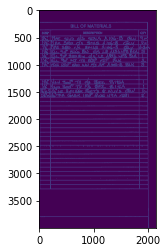

In [91]:
print("Base score for format 1:", scores_base[0])
canny_edge_detection(crops_processing[0], texts_processing[0])

Base score for format 2: 64.58112407211028
Score Algorithm:  43.73854612095297
Best Shape:  3
Best Lower:  0.7
Best Upper:  1.1


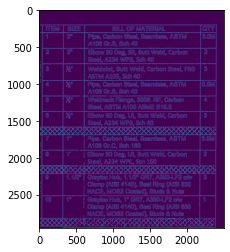

In [92]:
print("Base score for format 2:", scores_base[1])
canny_edge_detection(crops_processing[1], texts_processing[1])

Base score for format 3: 50.332005312084995
Score Algorithm:  20.143027413587607
Best Shape:  3
Best Lower:  0.7
Best Upper:  1.1


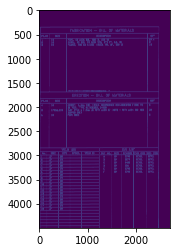

In [93]:
print("Base score for format 3:", scores_base[2])
canny_edge_detection(crops_processing[2], texts_processing[2])

Base score for format 4: 42.50936329588015
Score Algorithm:  22.577777777777776
Best Shape:  3
Best Lower:  0.7
Best Upper:  1.3


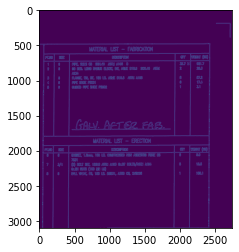

In [94]:
print("Base score for format 4:", scores_base[3])
canny_edge_detection(crops_processing[3], texts_processing[3])

In [91]:
techniques_scores["canny_edge"] = statistics.mean([9.47, 43.73, 20.14, 22.57])

3.6) Contour Detection

3.6.1) Internal Contour

In [124]:
# Multi-stage detector:

# Image and true text as parameters input

# Grayscale image needed, which is already in variable
# Use of for loop to iterate over different thresholds
# 
# Find contours function have 3 arguments: first, the thresholded image.
# second, complete contours internal and external (can be accesed separately later)
# third, contour approximation method is simple, saving memory on trade-off full contour of shape.
# It return, the contours, and the hirarchy (array of contours positions and parameter; int or ext)

# variable instanciated which is an array of 0's (dark) image with same shape of the original image
# contours will be drawed there

# for loop which iterate through the number of countours detected, where if in hierarchy, the last
# column equals -1 means is external, not equals would retrieve internal contours. These desired contours
# are drawed in the array of 0's and saved.

# Then image reading to pass through tesseract, clean text, compare and ger accuract score, 
# Appending best threshold and score when higuest score occure. 

# same process repeating again with best threshold, only for picture demostration

def internal_contours(image, text):
    
    best_thresh = float("-inf")
    best_score = float("-inf")
    
    for t in range(30, 230, 60):    
        ret, thresh_image = cv2.threshold(image,t,255, cv2.THRESH_BINARY)

        contours, hierarchy = cv2.findContours(thresh_image, 
                                       cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
        count = np.zeros(image.shape)
    
        for i in range(len(contours)):
                if hierarchy[0][i][3] != -1:
                    cv2.drawContours(count, contours, i, 255, -1)
                    cv2.imwrite("01.png", count)
                    
        tess = pytesseract.image_to_string(cv2.imread("01.png"))
        tess = clean_tess(tess)
        score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
        if score > best_score:
            best_score = score
            best_thresh = t
                    
    print("Algorithm score: ", best_score)
    print("Best Threshold: ", best_thresh)
    ret, thresh_image = cv2.threshold(image,best_thresh,255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh_image, 
                                    cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    count = np.zeros(image.shape)
    
    for i in range(len(contours)):
            if hierarchy[0][i][3] != -1:
                cv2.drawContours(count, contours, i, 255, -1)
    plt.imshow(count)

Base score for format 1: 6.176470588235294
Algorithm score:  10.037641154328734
Best Threshold:  90


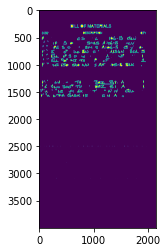

In [125]:
print("Base score for format 1:", scores_base[0])
internal_contours(crops_processing_greyscale[0], texts_processing[0])

Base score for format 2: 64.58112407211028
Algorithm score:  66.95815115552779
Best Threshold:  210


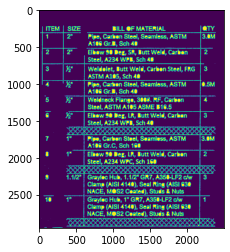

In [126]:
print("Base score for format 2:", scores_base[1])
internal_contours(crops_processing_greyscale[1], texts_processing[1])

Base score for format 3: 50.332005312084995
Algorithm score:  16.56516443361754
Best Threshold:  150


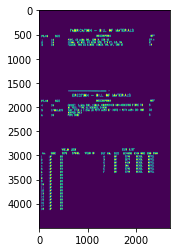

In [127]:
print("Base score for format 3:", scores_base[2])
internal_contours(crops_processing_greyscale[2], texts_processing[2])

Base score for format 4: 42.50936329588015
Algorithm score:  16.550522648083625
Best Threshold:  150


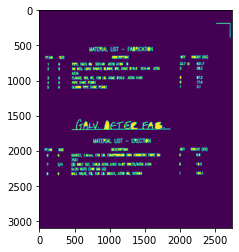

In [128]:
print("Base score for format 4:", scores_base[3])
internal_contours(crops_processing_greyscale[3], texts_processing[3])

In [92]:
techniques_scores["internals_contours"] = statistics.mean([10.03, 66.95, 16.56, 16.55])

3.6.2) External Contours

In [31]:
# Similar approach but with the parameter of last column on hierarchy equal -1 (external)

def external_contours(image, text):
    
    best_thresh = float("-inf")
    best_score = float("-inf")
    
    for t in range(30, 230, 60):    
        ret, thresh_image = cv2.threshold(image,t,255, cv2.THRESH_BINARY)

        contours, hierarchy = cv2.findContours(thresh_image, 
                                       cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
        count = np.zeros(image.shape)
    
        for i in range(len(contours)):
                if hierarchy[0][i][3] == -1:
                    cv2.drawContours(count, contours, i, 255, -1)
                    cv2.imwrite("01.png", count)
                    
        tess = pytesseract.image_to_string(cv2.imread("01.png"))
        tess = clean_tess(tess)
        score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
        if score > best_score:
            best_score = score
            best_thresh = t
                    
    print("Algorithm score: ", best_score)
    print("Best Threshold: ", best_thresh)
    ret, thresh_image = cv2.threshold(image,best_thresh,255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh_image, 
                                    cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    count = np.zeros(image.shape)
    
    for i in range(len(contours)):
            if hierarchy[0][i][3] == -1:
                cv2.drawContours(count, contours, i, 255, -1)
    plt.imshow(count)

Base score for format 1: 6.176470588235294
Algorithm score:  2.13903743315508
Best Threshold:  150


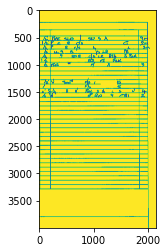

In [35]:
print("Base score for format 1:", scores_base[0])
external_contours(crops_processing_greyscale[0], texts_processing[0])

Base score for format 2: 64.58112407211028
Algorithm score:  2.3781212841854935
Best Threshold:  150


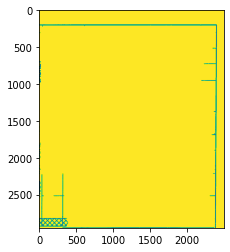

In [36]:
print("Base score for format 2:", scores_base[1])
external_contours(crops_processing_greyscale[1], texts_processing[1])

Base score for format 3: 50.332005312084995
Algorithm score:  0.0
Best Threshold:  30


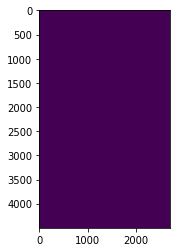

In [37]:
print("Base score for format 3:", scores_base[2])
external_contours(crops_processing_greyscale[2], texts_processing[2])

Base score for format 4: 42.50936329588015
Algorithm score:  0.0
Best Threshold:  30


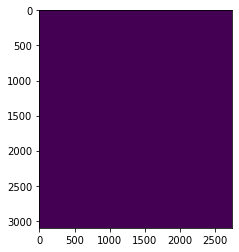

In [38]:
print("Base score for format 4:", scores_base[3])
external_contours(crops_processing_greyscale[3], texts_processing[3])

In [39]:
techniques_scores["externals_contours"] = statistics.mean([2.13, 2.37, 0, 0])

4) Techniques Applications and Results

In [95]:
sorted(techniques_scores.items(), key=lambda x: x[1])

[('canny_edge', 23.9775),
 ('internals_contours', 27.5225),
 ('HSV', 34.84346349922318),
 ('HLS', 37.65261319837887),
 ('first_approach', 40.89974081707768),
 ('BGR2RGB', 41.13894914913203),
 ('tozero', 46.425000000000004),
 ('median', 49.3075),
 ('averaging', 50.6775),
 ('tozero_inv', 51.1175),
 ('binary', 51.2975),
 ('trunc', 52.19),
 ('gamma_correction', 52.335),
 ('binary_inv', 52.575),
 ('2Dconvolution', 56.629999999999995)]

In [96]:
# Best score: 2Dconvolution filtering
# Second best score: Binary_inv
# Third best score: Gamma correction

2Dconvolution

In [97]:
def kernel_2Dconvolution(image, text):
    
    shapes = [3, 5, 10, 15, 20]
    pixels = [10, 25, 50, 75, 100]
    
    best_score = float("-inf")
    best_shape = float("-inf")
    best_pixel = float("-inf")
    
    for shape in shapes:
        for pixel in pixels:
            kernel = np.ones(shape=(shape, shape), dtype=np.float32)/pixel
            destination = cv2.filter2D(image, -1, kernel)
            tess = pytesseract.image_to_string(destination)
            tess = clean_tess(tess)
            score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
            if score > best_score:
                best_score = score
                best_shape = shape 
                best_pixel = pixel
                
    return best_score

In [100]:
total_scores_2D = []

for image, text in zip(all_images, all_tess):
    score = kernel_2Dconvolution(image, text)
    total_scores_2D.append(score)

In [101]:
for score in total_scores_2D:
    print(score)

14.945652173913043
46.15384615384615
22.56809338521401
47.02970297029702
67.30964467005076
79.07276239536381
65.25641025641026
53.2555879494655
58.76168224299065
79.21279212792129
69.13838120104438
65.94110115236876
66.20450606585788
63.83664696399784
66.73553719008265
69.35483870967742
64.46370530877573
62.38881829733164
29.21270718232044
80.0
62.975027144408244
80.43925875085792
60.81481481481481
58.35591689250226
86.97095435684648
69.67895362663495
61.98547215496368
71.2401055408971
64.66666666666666
69.41309255079007
82.71872740419379
64.01673640167364
66.9833729216152
71.15987460815047
66.51933701657458
45.94767070835992
59.291395516992054
61.863173216885
57.20108695652174
62.918509159823124
86.34020618556701
69.6219035202086
62.66375545851528
60.93117408906883
82.33766233766234
61.19402985074627
40.121580547112465
94.49838187702265
54.317548746518106
70.21857923497268


In [106]:
print("Total average score for 2DConvolution: ", statistics.mean(total_scores_2D))

Total average score for 2DConvolution:  63.564947693089906


Binary_inv

In [109]:
images_grayscale = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in all_images]

In [115]:
def binarisation(image, text):
    
    best_thresh = float("-inf")
    best_score = float("-inf")

    for thresh in range(30, 230, 10):
        the, threshimg = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY_INV)
        tess = pytesseract.image_to_string(threshimg)
        tess = clean_tess(tess)
        score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
        if score > best_score:
            best_score = score
            best_thresh = thresh
            
    return best_score

In [116]:
total_scores_binary_inv = []

for image, text in zip(images_grayscale, all_tess):
    score = binarisation(image, text)
    total_scores_binary_inv.append(score)

In [117]:
for score in total_scores_binary_inv:
    print(score)

23.04832713754647
50.15290519877675
22.67573696145125
52.85285285285285
68.97938662644545
82.58138206739007
67.2622175512349
58.53164556962025
69.37738246505718
71.06773823191733
71.64026571282575
65.74185765983113
74.25860023724793
60.74228959749085
90.17341040462428
85.05392912172573
70.78787878787878
79.5307917888563
89.41669577366399
95.06903353057199
73.74793615850302
90.83390764989663
58.832279657865385
93.47111319868483
96.44171779141104
94.8364209696492
73.55889724310777
64.33152442032561
86.88387635756057
70.11425135297655
86.12637362637363
90.99462365591397
76.15526802218115
70.86743044189852
87.17666483214089
81.13425925925925
83.12993539124193
66.33237822349571
82.59345794392523
74.56896551724138
92.8478543563069
96.76165803108809
98.01488833746899
92.90573372206026
97.62202753441802
98.96432681242808
98.80239520958084
98.36779107725789
92.36363636363636
96.97802197802197


In [118]:
print("Total average score for Binary invert: ", statistics.mean(total_scores_binary_inv))

Total average score for Binary invert:  78.29407884825858


Gamma Correction

In [119]:
def gamma(image, text):
    
    best_gamma = float("-inf")
    best_score = float("-inf")
    
    for gamma in np.arange(0.1, 3.1, 0.1):
        gamma_image = np.power(image, gamma)
        gamma_image = cv2.normalize(gamma_image, None, alpha = 0, beta = 255, 
                                    norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
        gamma_image = gamma_image.astype(np.uint8)
        tess = pytesseract.image_to_string(gamma_image)
        tess = clean_tess(tess)
        score = difflib.SequenceMatcher(None, tess, text).ratio() * 100
        if score > best_score:
            best_score = score
            best_gamma = gamma
            
    return best_score

In [120]:
total_scores_gamma = []

for image, text in zip(all_images, all_tess):
    score = gamma(image, text)
    total_scores_gamma.append(score)

In [121]:
for score in total_scores_gamma:
    print(score)

100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
65.67493112947659
96.08404966571156
100.0
75.52941176470588
100.0
97.22991689750693
100.0
93.46473029045643
100.0
97.37486874343718
96.8593536640874
98.04241435562805
100.0
100.0
96.45114244044726
100.0
100.0
100.0
100.0
100.0
100.0
96.77066228790366
93.9464493597206
100.0
100.0
100.0
100.0
98.1205443940376
100.0
98.76847290640394
96.31067961165049
100.0
100.0
100.0
99.56331877729258
100.0
100.0


In [122]:
print("Total average score for Gamma correction: ", statistics.mean(total_scores_gamma))

Total average score for Gamma correction:  98.00381892576932


In [123]:
# 2Dconvolution: 65.56 %
# Binary Inverted: 78.29 %
# Gamma Correction: 98 %